# How to use specutils to read, plot, and analyze a spectrum

* I am using the spectrum of Globular Cluster M92 as an example.
* If you are using colab, you will need to install specutils using

```
pip install specutils
```

In [37]:
# import modules
from specutils import Spectrum1D
from specutils.fitting import fit_generic_continuum


from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

from astropy.io import fits
from astropy import units as u

In [58]:
from astropy.nddata import StdDevUncertainty


### Define input file and read it in

In [2]:
infile = 'M92_Object_CROP.fit'

In [84]:
test = fits.getdata(infile)
size=test.size
M92spec = Spectrum1D.read(infile,unit=u.adu,uncertainty = StdDevUncertainty(0.2*np.ones(size)))

Text(0.5, 1.0, 'LISA Spectrum of M92')

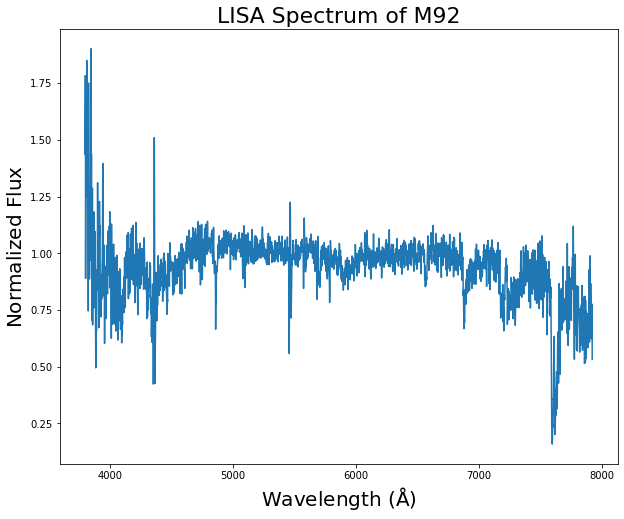

In [47]:
# plot spectrum 

plt.figure(figsize=(10,8))
plt.plot(M92spec.wavelength,M92spec.flux)
plt.xlabel(r'$\rm Wavelength \ (\AA)$',fontsize=20)
plt.ylabel(r'$\rm Normalized \ Flux$',fontsize=20)
plt.title('LISA Spectrum of M92',fontsize=22)

# Fit the continuum to make a normalized spectrum

In [48]:
contFit = fit_generic_continuum(M92spec)

In [49]:
ycontFit = contFit(M92spec.wavelength)

Text(0.5, 1.0, 'LISA Spectrum of M92')

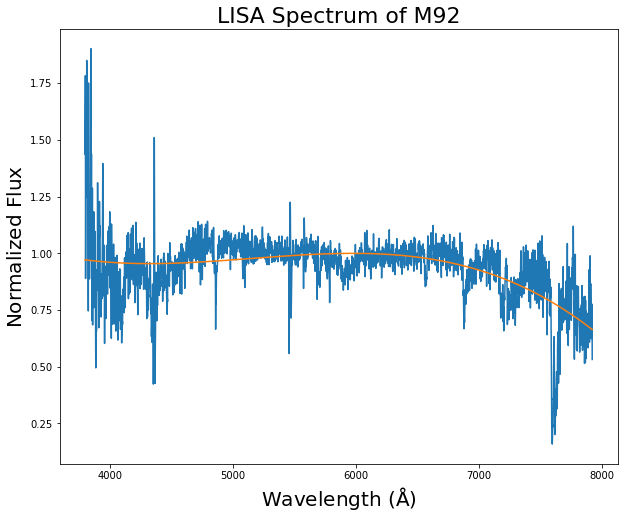

In [50]:

plt.figure(figsize=(10,8))
plt.plot(M92spec.wavelength,M92spec.flux)
plt.plot(M92spec.wavelength,ycontFit)
plt.xlabel(r'$\rm Wavelength \ (\AA)$',fontsize=20)
plt.ylabel(r'$\rm Normalized \ Flux$',fontsize=20)
plt.title('LISA Spectrum of M92',fontsize=22)

In [51]:
M92spec_normalized = M92spec/ycontFit

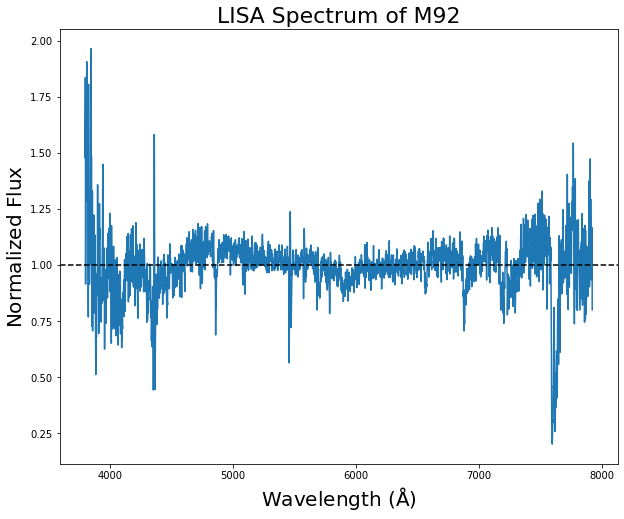

In [52]:

plt.figure(figsize=(10,8))
plt.plot(M92spec.wavelength,M92spec_normalized.flux)
#plt.plot(spec.wavelength,ycontFit)
plt.xlabel(r'$\rm Wavelength \ (\AA)$',fontsize=20)
plt.ylabel(r'$\rm Normalized \ Flux$',fontsize=20)
plt.title('LISA Spectrum of M92',fontsize=22)
plt.axhline(y=1,color='k',ls='--')

# Comparison stars from Pickles library


* We can compare the spectrum of M92 to a library of main sequence stars.
* This will allow us to find the stellar spectrum that resembles M92 most closely.
* I downloaded spectra from the Pickles atlas from here:
https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/pickles-atlas
  * I used the uvi set https://archive.stsci.edu/hlsps/reference-atlases/cdbs/grid/pickles/dat_uvi/
  * The first 45 are the main sequence stars.  You could download all of them, or just a subset of every ~5 stars.

In [26]:
pickles_dir = '/home/rfinn/siena/courses/ASTR380/Pickles/'

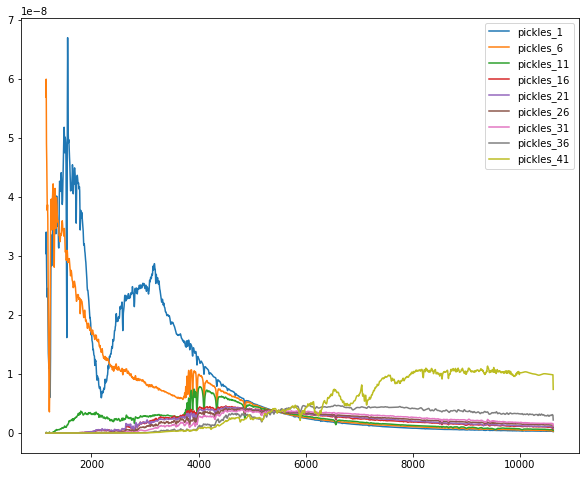

In [85]:
# plot some pickles spectra
# here I am selecting every fifth star
star_indices = np.arange(1,45,5)
plt.figure(figsize=(10,8))
pickles_templates = []
for i in star_indices:
    pfile = pickles_dir+'pickles_{}.fits'.format(i)
    t = fits.getdata(pfile)
    size = len(t['FLUX'])
    pspec = Spectrum1D(flux=t['FLUX']*u.adu,spectral_axis=t['WAVELENGTH']*u.AA,uncertainty = StdDevUncertainty(0.2*np.ones(size)*u.adu))
    pickles_templates.append(pspec)
    plt.plot(pspec.wavelength,pspec.flux,label='pickles_{}'.format(i))
plt.legend()

# Plot the stellar spectra with M92

[3800, 8000, 0.5, 3]

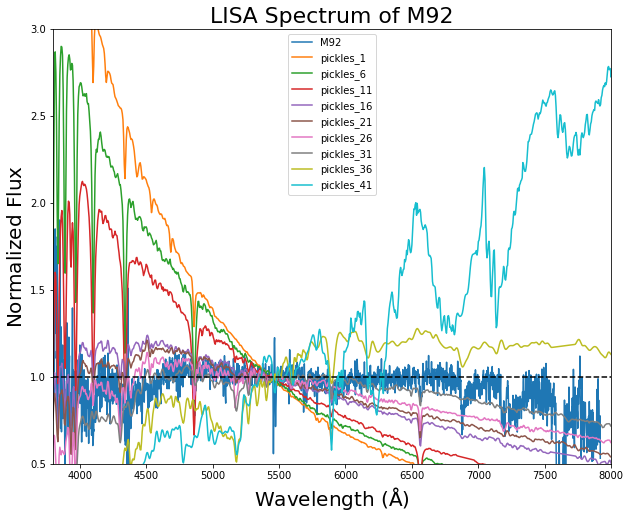

In [105]:
plt.figure(figsize=(10,8))
plt.plot(M92spec.wavelength,M92spec.flux,label="M92")
star_indices = np.arange(1,45,5)

for i in star_indices:
    pfile = pickles_dir+'pickles_{}.fits'.format(i)
    t = fits.getdata(pfile)
    size = len(t['FLUX'])
    pspec = Spectrum1D(flux=t['FLUX']*u.adu,spectral_axis=t['WAVELENGTH']*u.AA,uncertainty = StdDevUncertainty(0.2*np.ones(size)*u.adu))
    # I am scaling the flux by 3E8 so that the spectra overlap with M92
    plt.plot(pspec.wavelength,pspec.flux*2.7e8,label='pickles_{}'.format(i))
plt.legend()


plt.xlabel(r'$\rm Wavelength \ (\AA)$',fontsize=20)
plt.ylabel(r'$\rm Normalized \ Flux$',fontsize=20)
plt.title('LISA Spectrum of M92',fontsize=22)
plt.axhline(y=1,color='k',ls='--')
plt.axis([3800,8000,0.5,3])

* You could then identify the spectral type of the star that matches M92 most closely.
  * In the above plot, I would save pickles_31 is closest.  
  * If I look at the list of stars in Table 2 https://www.stsci.edu/hst/instrumentation/reference-data-for-calibration-and-tools/astronomical-catalogs/pickles-atlas, then I can see that star 31 is a K0V star.
* To further refine the search, you could then plot the spectral templates that are closer to 31, for example 28-35.
  * you could then see if you can pinpoint the best-matching stellar template more precisely.
* You could then look up the lifetime of the best-matching main sequence star and use this to estimate the age of M92.

# Going further

* in principle, there are templates where you could vary the metallicity and see the resulting spectrum.  
* you could also try to estimate the equivalent width of the Calcium H and K lines ($\lambda 3934, 3969$).  However, this is a really noisy part of the spectrum.


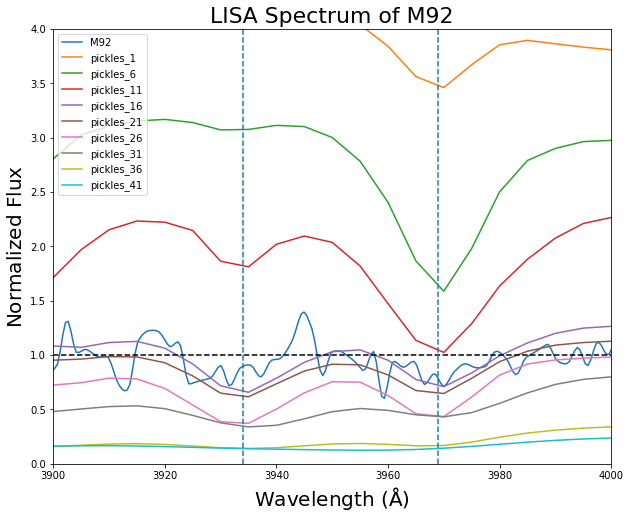

In [101]:
plt.figure(figsize=(10,8))
plt.plot(M92spec.wavelength,M92spec.flux,label="M92")
star_indices = np.arange(1,45,5)

for i in star_indices:
    pfile = pickles_dir+'pickles_{}.fits'.format(i)
    t = fits.getdata(pfile)
    size = len(t['FLUX'])
    pspec = Spectrum1D(flux=t['FLUX']*u.adu,spectral_axis=t['WAVELENGTH']*u.AA,uncertainty = StdDevUncertainty(0.2*np.ones(size)*u.adu))
    # I am scaling the flux by 3E8 so that the spectra overlap with M92
    plt.plot(pspec.wavelength,pspec.flux*3e8,label='pickles_{}'.format(i))
plt.legend()


plt.xlabel(r'$\rm Wavelength \ (\AA)$',fontsize=20)
plt.ylabel(r'$\rm Normalized \ Flux$',fontsize=20)
plt.title('LISA Spectrum of M92',fontsize=22)
plt.axhline(y=1,color='k',ls='--')
plt.axis([3900,4000,0,4])
plt.axvline(x=3934,ls='--')
plt.axvline(x=3969,ls='--')